# 1.

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

from google_trans_new import google_translator
from translate import Translator

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading Data files
review_1 = pd.read_csv('phone_user_review_file_1.csv', encoding='iso-8859-1')
review_2 = pd.read_csv('phone_user_review_file_2.csv', encoding='iso-8859-1')
review_3 = pd.read_csv('phone_user_review_file_3.csv', encoding='iso-8859-1')
review_4 = pd.read_csv('phone_user_review_file_4.csv', encoding='iso-8859-1')
review_5 = pd.read_csv('phone_user_review_file_5.csv', encoding='iso-8859-1')
review_6 = pd.read_csv('phone_user_review_file_6.csv', encoding='iso-8859-1')

In [5]:
review_1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [6]:
print(f'review_1: Rows: {review_1.shape[0]} and Columns: {review_1.shape[1]}\n')
print(f'review_2: Rows: {review_2.shape[0]} and Columns: {review_2.shape[1]}\n')
print(f'review_3: Rows: {review_3.shape[0]} and Columns: {review_3.shape[1]}\n')
print(f'review_4: Rows: {review_4.shape[0]} and Columns: {review_4.shape[1]}\n')
print(f'review_5: Rows: {review_5.shape[0]} and Columns: {review_5.shape[1]}\n')
print(f'review_6: Rows: {review_6.shape[0]} and Columns: {review_6.shape[1]}\n')
print(f'Total rows: {review_1.shape[0]+review_2.shape[0]+review_3.shape[0]+review_4.shape[0]+review_5.shape[0]+review_6.shape[0]}')

review_1: Rows: 374910 and Columns: 11

review_2: Rows: 114925 and Columns: 11

review_3: Rows: 312961 and Columns: 11

review_4: Rows: 98284 and Columns: 11

review_5: Rows: 350216 and Columns: 11

review_6: Rows: 163837 and Columns: 11

Total rows: 1415133


In [7]:
print('Check whether the column names are same in all the dataframes: ')
all(np.unique(review_1.columns.tolist()) == np.unique(review_1.columns.tolist()+
                                                      review_2.columns.tolist()+
                                                      review_3.columns.tolist()+
                                                      review_4.columns.tolist()+
                                                      review_5.columns.tolist()+
                                                      review_6.columns.tolist()))

Check whether the column names are same in all the dataframes: 


True

In [8]:
#Merge the data into a single dataframe 
reviews = pd.concat([review_1,review_2,review_3,review_4,review_5,review_6], ignore_index=True)
del review_1, review_2, review_3, review_4, review_5, review_6
print(f'reviews: Rows: {reviews.shape[0]} and Columns: {reviews.shape[1]}\n')
print('Top 5 rows of the data: ')
display(reviews.head())
print('Bottom 5 rows of the data: ')
display(reviews.tail())

reviews: Rows: 1415133 and Columns: 11

Top 5 rows of the data: 


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


Bottom 5 rows of the data: 


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
1415128,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2.0,10.0,Weil mein Onkel bei ALcatel arbeitet habe ich ...,david.paul,Alcatel Club Plus Handy
1415129,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
1415130,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
1415131,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy
1415132,/cellphones/alcatel-ot-club_1187/,4/25/2000,de,de,Ciao,ciao.de,2.0,10.0,"Was sich Alkatel hier wieder ausgedacht hat,sc...",michaelawr,Alcatel Club Plus Handy


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


Except **score** and **score_max** (which are of float type) all other features are of object type.

Feature **date** should be of **datetype**.

Also, **score**, **score_max**, **extract** and **author**: columns seems to have Null values.

In [10]:
df=reviews.isna().sum().round(2)
df1 = (df*100/reviews.shape[0]).round(2)
print('Missing count and percentages for each column are: \n',df.astype('str') +' ('+ df1.astype('str')+'%)')

#fig = px.bar(x=df.index, y=df1,text = df.astype('str') +'('+ df1.astype('str')+'%)',
#             title="Count (text) and Percentage(yaxis) of missing values in all the features (data: reviews)")
#fig.update_xaxes(title_text= 'Features')
#fig.update_yaxes(title_text= 'Percentage of Missing values')
#fig.show()
del df, df1

Missing count and percentages for each column are: 
 phone_url         0 (0.0%)
date              0 (0.0%)
lang              0 (0.0%)
country           0 (0.0%)
source            0 (0.0%)
domain            0 (0.0%)
score        63489 (4.49%)
score_max    63489 (4.49%)
extract      19361 (1.37%)
author       63202 (4.47%)
product           1 (0.0%)
dtype: object


Thus, these three features have approximately 4.5% of the missing values. 'score' and 'score_max' have exactly the same number of missing values.

In [11]:
print('Number of unique values in each feature: \n',reviews.nunique())

Number of unique values in each feature: 
 phone_url       5556
date            7728
lang              22
country           42
source           331
domain           384
score             86
score_max          1
extract      1321353
author        801103
product        61313
dtype: int64


Implies that, score_max for all the phones is 10 throughout.

In [12]:
# Top 10 Non-english users
reviews[reviews['lang']!='en']['author'].value_counts(ascending=False)[:10]

Cliente Amazon        19276
e-bit                  8663
Client d'Amazon        7613
Amazon Kunde           4735
Amazon Customer        2713
einer Kundin           2610
einem Kunden           1898
unknown                1718
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ     1070
Ð¡ÐµÑÐ³ÐµÐ¹            904
Name: author, dtype: int64

In [13]:
# Top 10 Non-english products
reviews[reviews['lang']!='en']['product'].value_counts(ascending=False)[:10]

Huawei P8lite zwart / 16 GB                                                                                                                                                                  2707
Samsung Galaxy Express I8730                                                                                                                                                                 2686
Samsung Galaxy S6 zwart / 32 GB                                                                                                                                                              2345
Nokia 5800 XpressMusic                                                                                                                                                                       1996
Nokia N95                                                                                                                                                                                    1848
Huawei P9 Lite Smartphone, LTE

Thus, a multiple similar names, with different details exist in product list. For eg:

1) Huawei P8lite zwart / 16 GB and

2) Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] are exactly same models.

Another observation is that 'phone_url' column also contains the phone name and model information. Let's check what extra information is present in 'product' column.

In [14]:
# print the frequency count of phone_url column
reviews['phone_url'].value_counts(ascending=False).head(50)

/cellphones/samsung-galaxy-s-iii/                                 17093
/cellphones/apple-iphone-5s/                                      16379
/cellphones/samsung-galaxy-s6/                                    16145
/cellphones/samsung-galaxy-s5/                                    16082
/cellphones/samsung-galaxy-s7-edge/                               15917
/cellphones/motorola-moto-g/                                      14476
/cellphones/samsung-galaxy-s7-789999/                             13488
/cellphones/samsung-i9500-galaxy-s-iv/                            13161
/cellphones/huawei-p8-lite/                                       12629
/cellphones/lenovo-vibe-k4-note/                                   9662
/cellphones/samsung-galaxy-s4-mini-gt-i9190-gt-i9192-dual-sim/     9027
/cellphones/samsung-galaxy-s6-edge-sm-g925f/                       8844
/cellphones/apple-iphone-4s/                                       8602
/cellphones/samsung-galaxy-s3-mini/                             

In [15]:
# frequency count of 'product' column for 'samsung-galaxy-s-iii' type phone
reviews[reviews["phone_url"]=='/cellphones/samsung-galaxy-s-iii/'][['product']].value_counts().head(15)

product                                                                                                                                         
Samsung Galaxy Express I8730                                                                                                                        2685
Samsung Galaxy S III 16GB (Virgin Mobile)                                                                                                            730
Samsung Galaxy S III                                                                                                                                 689
Samsung Galaxy S III 16GB (Straight Talk)                                                                                                            556
Samsung Galaxy S III i9300 Smartphone 16 GB (12,2 cm (4,8 Zoll) HD Super-AMOLED-Touchscreen, 8 Megapixel Kamera, Micro-SIM, Android 4.0) schwarz     381
Samsung Galaxy S III 16GB (Boost Mobile)                                                  

Exra information is generally:

1) phone memory: 8Gb/16GB/32GB etc

2) phone colour: Marble white, Blue, Red etc

3) carrier: AT&T, Verizon etc

Another observation is that these specifications are not present in all the product names, for eg: there is no-way available to differentiate between the 2 products below:

1) 'Samsung Galaxy S III Cellular Phone' and

2) 'Samsung Galaxy S III SPH-L710 - 16GB - Marble White (Sprint) Smartphone'

Thus, differentiating information is not same in all the product details. Also, the goal is to recommend a phone not the carrier. and other specs like color etc are of low importance in recommendation. The only consistent differentiating information in all the product names is the 'phone manufacturer and model number', which can also be extracted from 'phone_url' column. Let's check for other phone names as well.

In [16]:
# frequency count of 'product' column for 'apple-iphone-5s' type phone
reviews[reviews["phone_url"]=='/cellphones/apple-iphone-5s/'][['product']].value_counts().head(15)

product                                                                          
Apple iPhone 5s (Silver, 16GB)                                                       1603
Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹)                                        1355
Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray                            1273
Apple iPhone 5s (Gold, 16GB)                                                          682
Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ)                                        592
iPhone 5S APPLE IPHONE 5S 32GB SILVER UNLOCKED                                        434
Apple iPhone 5S (Silver, 16 GB)                                                       429
Sim Free Apple iPhone 5S 16GB Mobile Phone - Space Grey                               349
Apple iPhone 5S 16Gb                                                                  326
Sim Free Apple iPhone 5S 16GB Mobile Phone - Silver                                   286
Apple iPhone 5s 16

In [17]:
# frequency count of 'product' column for 'samsung-galaxy-s6' type phone
reviews[reviews["phone_url"]=='/cellphones/samsung-galaxy-s6/'][['product']].value_counts().head(15)

product                                                                                                                             
Samsung Galaxy S6 zwart / 32 GB                                                                                                         2345
Samsung Galaxy S6 32GB (AT&T)                                                                                                            979
Samsung Galaxy S6 32GB (Sprint)                                                                                                          935
Samsung Galaxy S6 32GB (Verizon)                                                                                                         919
Samsung Galaxy S6 wit / 32 GB                                                                                                            801
Samsung Galaxy S6 32GB (T-Mobile)                                                                                                        736
Samsung Galaxy S6    

In [18]:
# frequency count of 'product' column for 'samsung-galaxy-s5' type phone
reviews[reviews["phone_url"]=='/cellphones/samsung-galaxy-s5/'][['product']].value_counts().head(15)

product                                                                                                   
Samsung Galaxy S5 16GB (Verizon)                                                                              1432
Samsung Galaxy S5 16GB (T-Mobile)                                                                             1165
Samsung Galaxy S5 16GB (AT&T)                                                                                 1079
Smartphone Samsung Galaxy S5 SM-G900                                                                           671
Samsung Galaxy S5 Smartphone (5,1 Zoll (12,9 cm) Touch-Display, 16 GB Speicher, Android 4.4) electric blue     664
Samsung Galaxy S5 SM-G900T 4G LTE 16GB Smartphone, Black (T-Mobile)                                            513
Samsung Galaxy S5 goud / 16 GB                                                                                 480
Samsung Galaxy S5 16GB (Sprint)                                                         

As can be seen, same pattern is visible for the most comun types of phones. Thus it is better to use phone name and model number rather than other details mentioned in 'product' column.

In [19]:
reviews['phone'] = reviews['phone_url'].str.split("/").apply(lambda col: col[2]).replace('-', ' ', regex=True)
reviews['product'] = reviews['phone']
reviews['phone'].unique()

array(['samsung galaxy s8', 'samsung galaxy s6 edgeplus',
       'samsung galaxy s8 plus', ..., 'siemens c10', 'maxon mx 3204',
       'alcatel ot club_1187'], dtype=object)

In [20]:
reviews['product'].shape

(1415133,)

Distribution of number of ratings per item (Clipped at 10): 
 samsung galaxy s iii         17093
apple iphone 5s              16379
samsung galaxy s6            16145
samsung galaxy s5            16082
samsung galaxy s7 edge       15917
motorola moto g              14476
samsung galaxy s7 789999     13488
samsung i9500 galaxy s iv    13161
huawei p8 lite               12629
lenovo vibe k4 note           9662
Name: product, dtype: int64


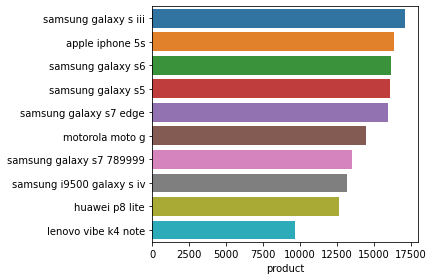

In [21]:
product = reviews['product'].value_counts()[:10]
print('Distribution of number of ratings per item (Clipped at 10): \n',product)
sns.barplot(y=product.index,x=product)
plt.tight_layout()
plt.show()

Distribution of number of ratings per user(Clipped at 10): 
 Amazon Customer    76978
NaN                63202
Cliente Amazon     19304
e-bit               8663
Client d'Amazon     7716
Amazon Kunde        4750
Anonymous           2750
einer Kundin        2610
einem Kunden        1898
unknown             1738
Name: author, dtype: int64


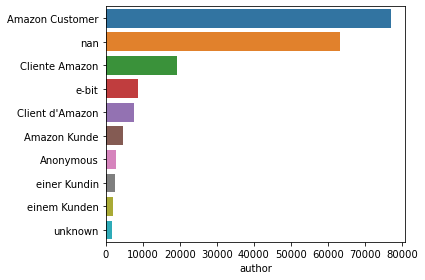

In [22]:
users = reviews['author'].value_counts(dropna=False)[:10]
print('Distribution of number of ratings per user(Clipped at 10): \n',users)
users.index = users.index.map(str)
sns.barplot(y=users.index,x=users)
plt.tight_layout()
plt.show()

Following observations are made:

1) Most active user is 'Amazon customer'.

2) 'Anonymous' and 'unknown' users are those whose names are not known. Thus we can use this to impute blank values in 'author' column.

3) Many names are similar but in different languages like 'Amazon customer' and 'Cliente Amazon'. Let's search for these first and cleanup the differences due to language.

Names like 'einer Kundin', 'einem Kunden', 'Anonymous' and 'unknown' can be interpreted in the same way i.e. an 'unknown customer'. Let's replace these names too.

In [23]:
unknowns = ['Anonymous','einer Kundin','einem Kunden', 'unknown','Anonymous ']
reviews['author'].replace(to_replace = unknowns, 
                          value = 'Anonymous', 
                          inplace=True)

Distribution of number of ratings per user(Clipped at 10): 
 Amazon Customer       76978
NaN                   63202
Cliente Amazon        19304
Anonymous             10457
e-bit                  8663
Client d'Amazon        7716
Amazon Kunde           4750
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ     1071
David                  1016
Ð¡ÐµÑÐ³ÐµÐ¹            904
Name: author, dtype: int64


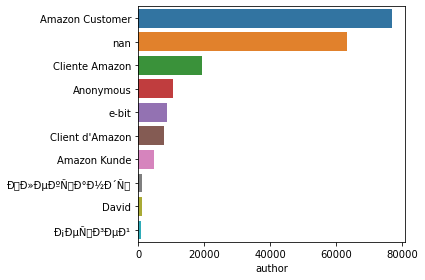

In [24]:
users = reviews['author'].value_counts(dropna=False)[:10]
print('Distribution of number of ratings per user(Clipped at 10): \n',users)
users.index = users.index.map(str)
sns.barplot(y=users.index,x=users)
plt.tight_layout()
plt.show()

In [25]:
# Let's check the score column of the data
print('Uniqe values in the "score" feature: \n',reviews.score.unique())

Uniqe values in the "score" feature: 
 [10.   6.   9.2  4.   8.   2.   9.6  7.2  6.8  9.   8.3  8.8  8.4  5.3
  7.   6.4  7.6  nan  5.2  3.2  4.4  2.8  5.6  3.6  4.8  1.   5.   3.
  2.4  9.3  8.5  9.5  6.5  5.5  9.8  8.2  8.6  7.8  9.4  6.6  6.2  7.5
  9.9  2.7  8.7  6.7  3.3  7.7  7.3  9.7  6.3  7.4  5.7  4.7  4.3  5.8
  4.2  4.5  2.2  5.4  7.9  3.5  4.6  3.7  2.5  3.4  7.1  8.1  1.2  1.4
  3.8  9.1  2.6  1.6  1.7  1.5  1.8  2.3  6.1  5.9  1.3  0.2  0.4  8.9
  6.9  0.6  4.9]


Rounding it off to the nearest integer.

In [26]:
relevant_features=['author','product','score']
# irrelvant_features=['phone_url','date','lang','country','source','domain','score_max','extract']

In [27]:
print('Number of duplicate rows: ', reviews.duplicated().sum())

Number of duplicate rows:  24877


In [28]:
orgnl_rows = reviews.shape[0]
orgnl_columns = reviews.shape[1]

In [29]:
revs1 = reviews.copy()

# Delete data which is not useful anymore, to save memory
del reviews

# Step1: remove irrelevant features
revs1 = revs1.loc[:,relevant_features]
print(f'Step1: revs1 Shape after removing irrelevant features: Rows: {revs1.shape[0]} and Columns: {revs1.shape[1]}\n')

# Step2: Round-off score feature to nearest integer
revs1['score'] = revs1['score'].round(0).astype('Int64')
print('Step2: Round-off: Unique values in the "score" feature(after rounding-off): \n',list(revs1.score.unique()))

# Step3: Impute missing values in score feature with median
revs1['score'] = revs1['score'].fillna(revs1['score'].median())
print('\nStep3: Imputation of "score"  with median and "author" with "Anonymous"')

# Step4: remove samples with missing values in 'Product' and 'author' feature and also 'Anonymous' values
revs1.dropna(inplace=True)
revs1 = revs1[revs1["author"] != 'Anonymous']
print(f'\nStep4: revs1 Shape(after removing missing values): Rows: {revs1.shape[0]} and Columns: {revs1.shape[1]}\n')

# Step5: remove duplicates, if any
revs1 = revs1.drop_duplicates()
print(f'Step5: revs1 Shape(after removing duplicates): Rows: {revs1.shape[0]} and Columns: {revs1.shape[1]}\n')

print(f'Overall {round(100 - revs1.shape[0]*100/orgnl_rows,2)}% samples are dropped\n')
revs1.head()

Step1: revs1 Shape after removing irrelevant features: Rows: 1415133 and Columns: 3

Step2: Round-off: Unique values in the "score" feature(after rounding-off): 
 [10, 6, 9, 4, 8, 2, 7, 5, <NA>, 3, 1, 0]

Step3: Imputation of "score"  with median and "author" with "Anonymous"

Step4: revs1 Shape(after removing missing values): Rows: 1341474 and Columns: 3

Step5: revs1 Shape(after removing duplicates): Rows: 1154026 and Columns: 3

Overall 18.45% samples are dropped



,author,product,score
0,CarolAnn35,samsung galaxy s8,10
1,james0923,samsung galaxy s8,10
2,R. Craig,samsung galaxy s8,6
3,Buster2020,samsung galaxy s8,9
4,S Ate Mine,samsung galaxy s8,4


In [31]:
# separate 1 million data samples
RS=512 #just a constant
revs_1m = revs1.sample(n=1000000, random_state=RS)
print(f'revs2 Shape: Rows: {revs_1m.shape[0]} and Columns: {revs_1m.shape[1]}\n')

revs2 Shape: Rows: 1000000 and Columns: 3



# 2.

In [32]:
# 1. Most rated features
print('Most rated features/products: \n\n',revs_1m['product'].value_counts().head())

Most rated features/products: 

 samsung galaxy s5         11437
samsung galaxy s6         11089
motorola moto g           10363
samsung galaxy s7 edge    10359
apple iphone 5s           10230
Name: product, dtype: int64


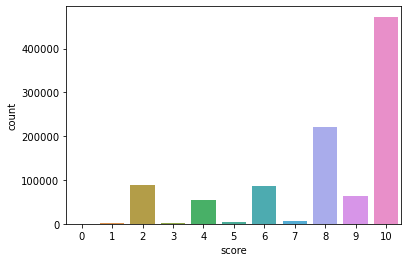

In [33]:
# find out which rating is given highest number of times
sns.countplot(data=revs_1m , x='score')
plt.show()

In [34]:
revs1[revs1['score']==10]['author'].value_counts().head(10)

Amazon Customer    1530
Cliente Amazon      519
Amazon Kunde        422
Client d'Amazon     301
David               292
Alex                274
Daniel              258
Marco               229
Chris               228
Michael             210
Name: author, dtype: int64

In [35]:
# 2. Users with highest number of reviews
print('Users with highest number of reviews: \n\n',revs_1m['author'].value_counts().head())

Users with highest number of reviews: 

 Amazon Customer    4854
Cliente Amazon     1677
Amazon Kunde       1165
Client d'Amazon    1011
David               561
Name: author, dtype: int64


In [36]:
# 3. Select data with products having >50 ratings and users who have given > 50 ratings
author50 = revs1['author'].value_counts()
author50 = author50[author50>50].index.tolist() # list of authors with > 50 ratings
print('Number of authors who have given >50 rating: ', len(author50))

product50 = revs1['product'].value_counts()
product50 = product50[product50>50].index.tolist() # list of products with > 50 ratings
print('Number of products with >50 rating: ', len(product50))

revs_50 = revs1[(revs1['author'].isin(author50)) & (revs1['product'].isin(product50))]
print(f'\nrevs_50: Rows: {revs_50.shape[0]} and Columns: {revs_50.shape[1]}\n')
del author50, product50
revs_50.head()

Number of authors who have given >50 rating:  805
Number of products with >50 rating:  2496

revs_50: Rows: 95672 and Columns: 3



,author,product,score
66,James,samsung galaxy s8,10
161,Paul,samsung galaxy s8,10
167,Robert,samsung galaxy s8,10
179,Michelle,samsung galaxy s8,10
225,Andrew,samsung galaxy s8,10


In [37]:
revs_50['author'].unique()[:100]

array(['James', 'Paul', 'Robert', 'Michelle', 'Andrew', 'Ralf',
       'Ð\x90Ð½Ð°Ñ\x82Ð¾Ð»Ð¸Ð¹', 'alessandro', 'Roberto',
       'Ð\x95Ð³Ð¾Ñ\x80', 'Ð\x92Ð»Ð°Ð´Ð¸Ð¼Ð¸Ñ\x80',
       'Ð\x90Ð»ÐµÐºÑ\x81Ð°Ð½Ð´Ñ\x80', 'Ð¡ÐµÑ\x80Ð³ÐµÐ¹', 'Michael',
       'Marco', 'Jan', 'Hans', 'Kim', 'Stefan', 'Nick', 'AndrÃ©', 'Kelly',
       'Manuel', 'Danilo', 'Ð\x9dÐ°Ð´ÐµÐ¶Ð´Ð°', 'Ð\x98Ð³Ð¾Ñ\x80Ñ\x8c',
       'Ð\x90Ð»ÐµÐºÑ\x81ÐµÐ¹', 'alex', 'Julien', "Client d'Amazon",
       'Client Amazon', 'Carlos', 'David', 'William', 'Amazon Customer',
       'Kindle Customer', 'bob', 'Gabriel', 'Denis', 'Sara', 'Dennis',
       'Fabian', 'MS', 'Jim', 'anonymous', 'Peter', 'Juan', 'Daniel',
       'Victor', 'Amber', 'Jennifer', 'Joseph', 'Ann', 'claudia', 'Mike',
       'Adam', 'Melanie', 'Adrian', 'mike', 'jose', 'Christine', 'JC',
       'Sam', 'juan', 'Lee', 'Carla', 'Steve', 'Marina', 'Samuel', 'Jay',
       'Scott', 'Cliente Amazon', 'Amazon Kunde', 'Lorenzo', 'Pseudonym',
       'Chiara', 'Simone', 'Paulo', 'G

In [38]:
revs_50['product'].unique()[:100]

array(['samsung galaxy s8', 'samsung galaxy s6 edgeplus',
       'samsung galaxy s8 plus', 'samsung galaxy s7 edge',
       'apple iphone 6s plus', 'samsung galaxy s7 789999',
       'apple iphone 7 plus', 'apple iphone 6s', 'huawei honor 7',
       'apple iphone 7', 'huawei ascend mate 8', 'xiaomi redmi 3',
       'apple iphone se', 'huawei p9 plus', 'htc 10', 'huawei honor 8',
       'huawei p9 lite', 'huawei mate 9', 'oneplus 3',
       'samsung galaxy s6 edge sm g925f', 'lg v10', 'google nexus 6p',
       'huawei p9 797082', 'samsung galaxy a5 2017',
       'samsung galaxy j5 4g lte 5 2 inches', 'samsung galaxy s6',
       'huawei p10', 'sony xperia xz', 'huawei p8', 'oneplus 3t',
       'samsung galaxy note 5 sm n920f', 'zte axon 7',
       'motorola moto x play', 'lg k10', 'samsung galaxy j5',
       'samsung galaxy a3 819970', 'samsung galaxy j3 duos',
       'xiaomi mi 5', 'asus zenfone 3', 'motorola moto z play',
       'vodafone smart ultra 6', 'samsung galaxy a5 2016',
     

In [67]:
target = 3000
top50_product = revs1['product'].value_counts()[0:50].rename('rating_count').to_frame()
top50_product['mean_ratings']=revs1[revs1['product'].isin(top50_product.index.tolist())].groupby(['product'])['score'].mean().astype('float64').round(1)
top50_product.sort_values(by='mean_ratings',inplace=True)
#print('Number of products with >'+str(target)+' rating: ', len(top50_product))

In [46]:
fig = px.scatter(top50_product, x=top50_product.index, y="mean_ratings", size="rating_count", size_max=60,
                  height=800,title="Visualisation of mean ratings vs rating count for highest rated 50 phones")
fig.show()

# 3.

In [43]:
def popularity_rec(data):
    ratings_mean_count = pd.DataFrame(data.groupby('product')['score'].mean())
    ratings_mean_count['rating_counts'] = data.groupby('product')['score'].count()
    ratings_mean_count = ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False])
    print('Top 5 recommendations for the products are: \n')
    display(ratings_mean_count.head())
    return

In [44]:
# Using the data from the most popular phones amongst the most frequent users
popularity_rec(revs_50)

Top 5 recommendations for the products are: 



,score,rating_counts
product,,
samsung e1120,10.0,4
zte v987,10.0,4
lenovo p700i,10.0,2
lg kf700,10.0,2
motorola mpx200,10.0,2


In [47]:
# if we consider the original data (excluding 'Anonymous' users)
popularity_rec(revs1)

Top 5 recommendations for the products are: 



,score,rating_counts
product,,
verykool t742,10.0,8
supersonic sc 150,10.0,6
verykool s505,10.0,5
vodafone smart 4 power,10.0,5
mitsubishi trium mondo,10.0,4


In [48]:
field_length = revs1.author.astype(str).map(len)
print (revs1.iloc[field_length.argmax(),0])

f1r4t 11.06.2013 13 kiÅi beÄendi brk bence cok yanlÄ±Å dÃ¼ÅÃ¼nÃ¼yorsun.telefonun polikarbon olmasÄ± telefonun aÄÄ±rlÄ±ÄÄ±nÄ± azaltÄ±r.ayrÄ±ca iphone5 2 Ã§ekirdekli s4 ise 8 Ã§ekirdeklidir.yani aradaki Ã¶zellik farkÄ±na gÃ¶re iphone 12 gram daha hafif.he ayrÄ±ca iphonunda 


# 4.

### Collaborative filtering model using SVD

In [49]:
# Rearrange columns for SVD and prepare train and testsets
revs50_ = Dataset.load_from_df(revs_50[['author','product','score']], Reader(rating_scale=(1, 10)))
trainset, testset = train_test_split(revs50_, test_size=.25,random_state=RS)

print('top 3 values from trainset: \n')
for key,value in {k: v for k, v in trainset.ur.items() if k <= 2}.items(): print(key,'-> ',value,'\n')
print('\ntop 3 values from testset: ', *testset[0:3], sep='\n\n')

top 3 values from trainset: 

0 ->  [(0, 10.0), (66, 10.0), (209, 10.0), (137, 10.0), (917, 10.0), (219, 10.0), (75, 10.0), (209, 9.0), (58, 8.0), (558, 8.0), (256, 10.0), (39, 6.0), (652, 6.0), (1767, 10.0), (268, 9.0), (369, 10.0), (558, 10.0), (1421, 10.0), (268, 7.0), (1449, 10.0), (1934, 9.0), (1090, 8.0), (333, 9.0), (228, 7.0), (93, 10.0), (1, 8.0), (58, 9.0), (384, 10.0), (1, 9.0), (823, 10.0), (59, 9.0), (569, 9.0), (657, 10.0), (774, 8.0), (58, 10.0), (122, 4.0), (868, 10.0), (867, 8.0), (447, 10.0), (528, 9.0), (66, 9.0), (611, 9.0), (494, 10.0), (171, 10.0), (157, 10.0), (378, 10.0), (301, 10.0), (1771, 10.0), (17, 10.0), (106, 10.0), (171, 9.0), (611, 10.0), (463, 9.0), (199, 8.0), (637, 10.0), (715, 8.0), (350, 6.0), (972, 9.0), (578, 10.0), (652, 10.0), (192, 8.0), (607, 9.0), (369, 9.0), (286, 4.0), (459, 10.0), (77, 3.0), (510, 10.0), (652, 8.0), (244, 8.0), (43, 4.0), (62, 9.0), (54, 6.0), (454, 10.0), (77, 10.0), (594, 10.0), (584, 10.0), (298, 9.0), (240, 10.0), (62

In [50]:
# Objective: To get top_n recommendation for each user
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [51]:
# fit and predict using svd
def svd_func(train, test):
    svd = SVD(random_state=RS)
    svd.fit(train)
    svd_pred = svd.test(test)
    return svd_pred, svd

svd_pred, svd = svd_func(trainset,testset)
print('First few prediction values: \n',svd_pred[0:2])
print('\nRMSE value(test-set): ',round(accuracy.rmse(svd_pred),2),'\n') # compute RMSE
svd_rmse = round(accuracy.rmse(svd_pred),2)

First few prediction values: 
 [Prediction(uid='Ð\x9dÐ¸ÐºÐ¾Ð»Ð°Ð¹', iid='nokia x2 02', r_ui=8.0, est=8.43128058759973, details={'was_impossible': False}), Prediction(uid='Anne', iid='samsung galaxy ace plus', r_ui=10.0, est=7.801063011653431, details={'was_impossible': False})]
RMSE: 2.9455

RMSE value(test-set):  2.95 

RMSE: 2.9455


### Collaborative filtering model using kNNWithMeans_Item based

In [52]:
# fit and predict using knn
def knn_item(train, test):
    knn_i = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
    knn_i.fit(train)
    knn_i_pred = knn_i.test(test)
    return knn_i_pred, knn_i

knn_i_pred, knn_i = knn_item(trainset, testset)
print('First few prediction values: \n',knn_i_pred[0:2])
print('\nRMSE value(Item-based Model, test-set): ',round(accuracy.rmse(knn_i_pred),2),'\n') # compute RMSE
knn_i_rmse = round(accuracy.rmse(knn_i_pred),2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
First few prediction values: 
 [Prediction(uid='Ð\x9dÐ¸ÐºÐ¾Ð»Ð°Ð¹', iid='nokia x2 02', r_ui=8.0, est=9.11841112682344, details={'actual_k': 50, 'was_impossible': False}), Prediction(uid='Anne', iid='samsung galaxy ace plus', r_ui=10.0, est=7.895110651031385, details={'actual_k': 39, 'was_impossible': False})]
RMSE: 2.8571

RMSE value(Item-based Model, test-set):  2.86 

RMSE: 2.8571


### Collaborative filtering model using kNNWithMeans_User based

In [53]:
# fit and predict using knn
def knn_user(train, test):
    knn_u = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
    knn_u.fit(train)
    knn_u_pred = knn_u.test(test)
    return knn_u_pred, knn_u

knn_u_pred, knn_u = knn_user(trainset, testset)
print('First few prediction values: \n',knn_u_pred[0:2])
print('\nRMSE value(User-based Model, test-set): ',round(accuracy.rmse(knn_u_pred),2),'\n') # compute RMSE
knn_u_rmse = round(accuracy.rmse(knn_u_pred),2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
First few prediction values: 
 [Prediction(uid='Ð\x9dÐ¸ÐºÐ¾Ð»Ð°Ð¹', iid='nokia x2 02', r_ui=8.0, est=8.33819154144121, details={'actual_k': 24, 'was_impossible': False}), Prediction(uid='Anne', iid='samsung galaxy ace plus', r_ui=10.0, est=8.101437744519474, details={'actual_k': 13, 'was_impossible': False})]
RMSE: 2.8866

RMSE value(User-based Model, test-set):  2.89 

RMSE: 2.8866


# 5.

svd_rmse =  2.95 
knn_i_rmse =  2.86 
knn_u_rmse =  2.89


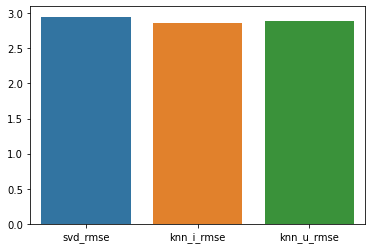

In [58]:
# Comparison of RMSE scores from different collaorative algorithms
sns.barplot(x=['svd_rmse','knn_i_rmse', 'knn_u_rmse'],y=[svd_rmse,knn_i_rmse, knn_u_rmse])
print('svd_rmse = ',svd_rmse,'\nknn_i_rmse = ',knn_i_rmse,'\nknn_u_rmse = ', knn_u_rmse)

Best RMSE score is given by knn (item based).

# 6.

In [59]:
svd_pred_df=pd.DataFrame(svd_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',svd_pred_df['est'].mean())
print('average rating  by test users: ',svd_pred_df['rui'].mean())
print('average prediction error for test users: ',(svd_pred_df['rui']-svd_pred_df['est']).abs().mean())

average prediction for test users:  7.819237602039821
average rating  by test users:  7.858851074504558
average prediction error for test users:  2.282413974985396


In [60]:
knn_i_pred_df=pd.DataFrame(knn_i_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knn_i_pred_df['est'].mean())
print('average rating  by test users: ',knn_i_pred_df['rui'].mean())
print('average prediction error for test users: ',(knn_i_pred_df['rui']-knn_i_pred_df['est']).abs().mean())

average prediction for test users:  7.766144481908979
average rating  by test users:  7.858851074504558
average prediction error for test users:  2.2493368155795688


In [61]:
knn_u_pred_df=pd.DataFrame(knn_u_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knn_u_pred_df['est'].mean())
print('average rating  by test users: ',knn_u_pred_df['rui'].mean())
print('average prediction error for test users: ',(knn_u_pred_df['rui']-knn_u_pred_df['est']).abs().mean())

average prediction for test users:  7.794279728901006
average rating  by test users:  7.858851074504558
average prediction error for test users:  2.2425663839528136


# 7.

### Findings and Inferences

1) Most popular phone (rated 10 by highest number of people):

    Overall: verykool t742
    Amongst top users: samsung e1120

2) Overall data is highly skewed towards 'Amazon customers' from different countries. This may also be because 'Amazon' is the biggest trader for phones in the world. Although correct 'user' names from 'Amazon' should have used.

3) Most of the authors have given the rating of '10' or '8'.

4) Both knn_i(item-based) and knn_u(user-based) have roughly similar RMSE.

# 8.

In [62]:
#recommend top 5 products for test users
top_5 = get_top_n(knn_i_pred,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_5.items(): print(key,'-> ',value,'\n') # to print all the recommendations for all the users
#print('Top 5 recommendations for 3 users are: \n')
#for key,value in {k: v for k, v in top_5.items() if k in ['Amazon Customer','Cliente Amazon',"Client d'Amazon"]}.items(): print(key,'-> ',value,'\n')

Top 5 recommendations for all test users are: 

ÐÐ¸ÐºÐ¾Ð»Ð°Ð¹ ->  [('acer liquid z5 duo', 10), ('apple iphone 6s', 9.694827191659575), ('sony xperia z 504642', 9.562778626563937), ('asus zenfone selfie zd551kl', 9.302303966268525), ('samsung galaxy j7', 9.241888206543836)] 

Anne ->  [('apple iphone 7', 9.195218538291176), ('apple iphone 7', 9.195218538291176), ('lg k10', 9.02715056325575), ('samsung wave 3', 8.883073733692498), ('sony ericsson k510i', 8.802552047819699)] 

Johan ->  [('huawei ascend mate 8', 9.96848169006881), ('huawei p8', 9.688017733622505), ('huawei p8', 9.688017733622505), ('samsung gt b2100', 9.112027583862266), ('samsung galaxy s7 edge', 9.056284713577208)] 

ana ->  [('sony xperia tx', 9.216049854480461), ('huawei ascend g7', 8.600136051576127), ('doogee dagger dg550', 8.354078279290249), ('lg g2 594708', 8.302605024502217), ('samsung galaxy j5', 8.13537148128063)] 

anonym ->  [('sony cmd j70', 10), ('sony ericsson w550i', 10), ('motorola timeport l7089', 10)

sewut ->  [('samsung p520', 9.381824407762167), ('nokia 2310', 9.343205199663792), ('sony ericsson w610i', 9.342482500424664), ('sony ericsson m600i', 9.215878128093658), ('samsung sgh f250', 9.205804561470947)] 

Vivek ->  [('blackberry z30', 7.428524409521249), ('htc one m9 plus', 7.425656329576478), ('google nexus 6', 7.367548977244792), ('huawei honor 5x', 7.191711051511751), ('motorola moto g4', 6.339605323702376)] 

Andi ->  [('acer liquid z3 duo', 9.678803697807602), ('microsoft lumia 640 xl', 9.487607247167675), ('samsung sph m540', 9.313696269800406), ('cubot note s', 8.960617281907334), ('htc wildfire s', 8.79266685306129)] 

Hugo ->  [('cubot gt99', 10), ('motorola moto g', 9.714481732022625), ('lg l90 d410', 9.70650660446587), ('apple iphone 7', 9.565415947873888), ('samsung galaxy s4 mini gt i9190 gt i9192 dual sim', 9.433376331493498)] 

ÐÐ²Ð³ÐµÐ½Ð¸Ñ ->  [('sony xperia l', 9.92315690846358), ('sony xperia m', 9.555051041731906), ('sony xperia z1 compact d5503', 9.536901

# 9.

### Cross Validation

In [63]:
svd_cv = cross_validate(svd,revs50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean svd cv score:', round(svd_cv['test_rmse'].mean(),2),'\n')
svd_cv


 Mean svd cv score: 2.96 



{'test_rmse': array([2.93977702, 2.96445883, 2.94438658, 2.97423564, 2.99447597]),
 'fit_time': (3.1978914737701416,
  3.2318661212921143,
  3.26462459564209,
  3.1952266693115234,
  3.2359719276428223),
 'test_time': (0.13199782371520996,
  0.10526442527770996,
  0.09375572204589844,
  0.10938262939453125,
  1.527829647064209)}

In [64]:
knn_i_cv = cross_validate(knn_i,revs50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean knn_i_cv score:', round(knn_i_cv['test_rmse'].mean(),2),'\n')
knn_i_cv

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean knn_i_cv score: 2.85 



{'test_rmse': array([2.83939645, 2.84933716, 2.87270487, 2.84477479, 2.83667554]),
 'fit_time': (4.4073193073272705,
  4.256576776504517,
  4.3550865650177,
  4.227660179138184,
  4.404470920562744),
 'test_time': (5.3786749839782715,
  6.326425075531006,
  5.480878829956055,
  6.298483610153198,
  5.404011964797974)}

In [65]:
knn_u_cv = cross_validate(knn_u,revs50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean knn_u_cv score:', round(knn_u_cv['test_rmse'].mean(),2),'\n')
knn_u_cv

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean knn_u_cv score: 2.88 



{'test_rmse': array([2.89650231, 2.88105365, 2.88223262, 2.88355246, 2.8781554 ]),
 'fit_time': (1.4347362518310547,
  1.448533058166504,
  1.5435969829559326,
  1.4473621845245361,
  1.4875118732452393),
 'test_time': (2.344235897064209,
  2.3944499492645264,
  2.4025180339813232,
  2.527998924255371,
  2.368591785430908)}

<AxesSubplot:>

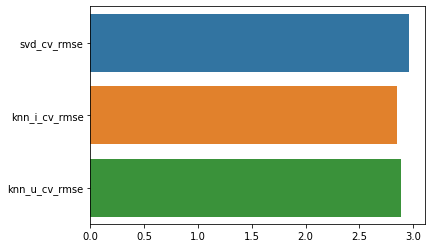

In [66]:
# Comparison of RMSE scores(mean cv) from different collaorative algorithms
sns.barplot(y=['svd_cv_rmse','knn_i_cv_rmse', 'knn_u_cv_rmse'],
            x=[svd_cv['test_rmse'].mean(),knn_i_cv['test_rmse'].mean(), knn_u_cv['test_rmse'].mean()])

Thus, for cross validation scores too knn_i gives a better performance.

# 10.

In what business scenario you should use popularity based Recommendation Systems ?

Popularity based recommendation systems can be useful in multiple scenarios like:

    1) When there is no data about the user and items.
    
    2) When it is required to show most popular items in different categories along with personalized results like:
        1. Most popular punjabi songs or most popular english songs on a music website/app.
        2. Most popular trend in western wear or traditional wear.
        3. Most popular holiday packages for honeymoon trips, or bike trips or himalayan trips etc.

# 11.

In what business scenario you should use CF based Recommendation Systems ?

Collaborative filtering is useful in scenarios like:

    Giving personalised recommendation to the user, when user history or item data is available.
    For example: Personalized movie recommendation of movie sites like Netflix, Amazon Prime, Youtube etc.

# 12.

What other possible methods can you think of which can further improve the recommendation for different users ?

Popularity and Collaborative Filtering, hybrid recommendation methods like Content + Collaborative method, Demographic, Utility based, and Knowledge based recommendation system can also be used.